In [1]:
#Hauss method
import numpy as np
import time

n = int(input())
A = np.random.rand(n, n)
f = np.random.rand(n)
A1 = A.copy()
f1 = f.copy()
for i in range(n):
    for j in range(n):
        if i != j:
            A[i][i] += A[i][j] 

linalg_time = time.time()
print()
print("LINALG")
print()
x1 = np.linalg.solve(A,f)
linalg_time = time.time() - linalg_time
for i in range(n):
    print(x1[i])

my_time = time.time()
for k in range(n):
        for j in range(k + 1, n):
            A[k, j] = A[k, j] / A[k, k]
        f[k] /= A[k][k]    
        for i in range(k + 1, n):
            for j in range(k + 1, n):
                A[i][j] = A[i][j] - A[i][k] * A[k][j]
            f[i] = f[i] - A[i][k] * f[k]
            A[i][k] = 0
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    x[i] = f[i]
    for j in range(i + 1, n):
        x[i] -= A[i][j] * x[j]
my_time = time.time() - my_time
print()
print("MY SOLUTION")
print()
for i in range(n):
    print(x[i])
print()
print("MY TIME:", my_time)
print("LINALG TIME", linalg_time)


50

LINALG

0.03058101221698866
0.00859370671471717
0.016662091516281965
0.023548318263582786
0.022734078984233574
0.008314464134073314
0.0015261552308970586
-0.009909640964774534
0.027624985777616497
0.01279723149527929
-0.003825138265656342
0.007329460382035712
-0.0071487872913873615
0.006069551460296376
0.019248933434436562
0.024722384101403854
0.007548449256211161
-0.009714381693198498
-0.0010362538443110072
0.01277788711460043
-0.0030457819962553547
0.006111578220169239
0.02206818059524249
-0.0037275859137847664
0.0025045767736643293
0.006310974218743744
-0.005727774279607361
0.016334314154980573
0.008759396505472597
0.019008524092961682
0.011267545885538403
0.015796846797968552
0.02691446741887141
0.023965350004224152
0.004611701560193319
-0.0019394277733855462
0.024346552288547083
0.015637804894842913
0.007409879052473917
0.01284623738466584
0.011218356655500753
0.03449329383392797
0.027517623987738243
-0.004335830946165452
-0.007081027543568322
0.004576012352413198
-4.832927705

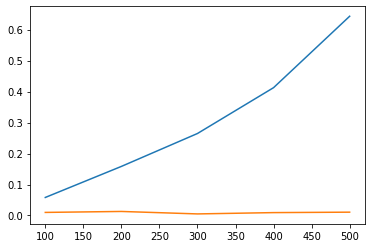

In [26]:
import matplotlib.pyplot as plt
n = [100, 200, 300, 400, 500]
MY_TIME = [0.058176279067993164, 0.1583724021911621, 0.2645840644836426, 0.41249990463256836, 0.6429448127746582]
LINALG_TIME = [0.009938478469848633, 0.013045072555541992, 0.005080461502075195, 0.009296417236328125, 0.010738849639892578]
plt.plot(n, MY_TIME)
plt.plot(n, LINALG_TIME)

In [39]:
#Cholesky method
import math
import numpy as np
import time

def cholesky(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i + 1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k): 
                L[i][k] = math.sqrt(abs(A[i][i] - tmp_sum))
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L
n = 3
X = np.random.rand(n, n)
A = np.transpose(X) * X

for i in range(n):
    for j in range(n):
        if i != j:
            A[i][i] += A[i][j] 

L = A

L = A.dot(np.transpose(L))


my_time = time.time()
B = cholesky(L)
my_time = time.time() - my_time

print ("A:")
print(A)

print("Linalg:")
linalg_time = time.time()
print(np.linalg.cholesky(L))
linalg_time = time.time() - linalg_time

print ("L(Answer):")
print(B)

print("MY TIME:", my_time)
print("LINALG TIME:", linalg_time)

A:
[[0.88887501 0.05306055 0.08962094]
 [0.05306055 0.4138639  0.19828969]
 [0.08962094 0.19828969 0.87901556]]
Linalg:
[[0.89495593 0.         0.        ]
 [0.09709411 0.45165283 0.        ]
 [0.18879295 0.53755739 0.7038525 ]]
L(Answer):
[[0.8949559270845976, 0.0, 0.0], [0.09709410577889332, 0.4516528344365602, 0.0], [0.18879294520099682, 0.5375573855264107, 0.7038524987576734]]
MY TIME: 7.891654968261719e-05
LINALG TIME: 0.00024390220642089844


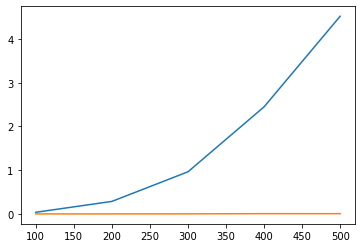

In [25]:
import matplotlib.pyplot as plt
n = [100, 200, 300, 400, 500]
MY_TIME = [0.03864097595214844, 0.28725266456604004, 0.9641067981719971, 2.4486637115478516, 4.5200841426849365]
LINALG_TIME = [0.001354217529296875, 0.0017931461334228516,  0.0028612613677978516, 0.007332801818847656, 0.007010459899902344]
plt.plot(n, MY_TIME)
plt.plot(n, LINALG_TIME)

In [25]:
#sweep method
import numpy as np
from scipy.linalg import solve_banded
import time

def sweep ( a, b, c, f, n):
    alpha = (n + 1) * [0]
    beta = (n + 1) * [0]
    x = np.random.rand(n)
    a[0] = 0
    c[n -  1] = 0
    alpha[0] = 0
    beta[0] = 0
    for i in range(0, n):  
        d = float(a[i] * alpha[i] + b[i])
        alpha [i + 1] = float(-c[i] / d)
        
        beta [i + 1] = float((f[i] - (a[i] * beta[i])) / (d))
    x[n - 1] = float(beta[n])
    for i in range(n - 2, -1, -1):
        x[i] = float(alpha[i + 1] * x[i + 1] + beta[i + 1])
    return x

n = int(input()) 

a = np.random.rand(n)
a[0] = 0
b = np.random.rand(n)
c = np.random.rand(n)
c[n - 1] = 0
for i in range(n):
    b[i] += a[i] + b[i]

f = np.random.rand(n)
a_linalg = np.array([0] + c[:-1].tolist())
b_linalg = b
c_linalg = np.array(a[1:].tolist() + [0])
A = np.array([a_linalg, b_linalg, c_linalg])
my_time = time.time()
print("My alg:", sweep(a, b, c, f, n))
my_time = time.time() - my_time
linalg_time = time.time()
print("Linalg:", solve_banded((1, 1), A, f))
linalg_time = time.time() - linalg_time
print("My time:", my_time)
print("Linalg time:", linalg_time)

3000
My alg: [ 0.54451316  0.27442251  0.13189084 ...  0.59542162 -0.4710802
  1.94286207]
Linalg: [ 0.54451316  0.27442251  0.13189084 ...  0.59542162 -0.4710802
  1.94286207]
My time: 0.016147851943969727
Linalg time: 0.0010223388671875


### 

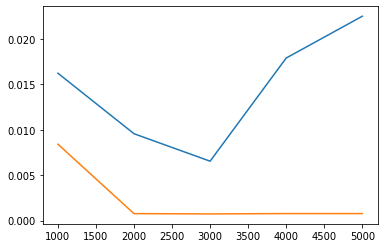

In [27]:
import matplotlib.pyplot as plt
n = [1000, 2000, 3000, 4000, 5000]
MY_TIME = [ 0.016228914260864258,  0.009568214416503906, 0.006544589996337891,  0.017900705337524414, 0.022501468658447266]
LINALG_TIME = [ 0.008415937423706055, 0.0007710456848144531, 0.0007398128509521484, 0.0007770061492919922, 0.0007781982421875]
plt.plot(n, MY_TIME)
plt.plot(n, LINALG_TIME)
